# Pymaceuticals Inc.
---

### Analysis

- Mouse l509 saw a significant reduction in tumor size during the course of its treatment via Capomulin, specifically after day 20.
- Capomulin and Ramicane were the most effect treatments when considering median tumor volume, mean tumor, and that fact that there were no outliers to skew the results when accounting for all of the mice that were treated with those drugs, respectively.
- Based on the scatter plot that visualizes the avg. tumor size vs. mouse weight, it is very likely that the larger a mouse is, the larger its tumor size will be. This is further supported by the correlation coefficient of 0.84, indicating that the metrics are strongly influenced by one another.

 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
num_mice = len(pd.unique(mouse_study['Mouse ID']))
print(num_mice)

249


In [13]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
unique_duplicated_mice = duplicated_mice['Mouse ID'].unique()
unique_duplicated_mice


array(['g989'], dtype=object)

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study[~mouse_study['Mouse ID'].isin(unique_duplicated_mice)]
mouse_study_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(pd.unique(mouse_study_clean['Mouse ID']))
print(num_mice_clean)

248


## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice_mean = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mice_median = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mice_var = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mice_standev = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mice_sem = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mice_sum_stats = pd.DataFrame({
    'mean_tumor_volume': mice_mean,
    'median_tumor_volume': mice_median,
    'tumor_volume_variance': mice_var,
    'tumor_volume_std_dev': mice_standev,
    'tumor_volume_std_err': mice_sem
})

mice_sum_stats


,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_std_dev,tumor_volume_std_err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
mice_sum_stats_agg = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean_tumor_volume='mean', median_tumor_volume='median', tumor_volume_variance='var', tumor_volume_std_dev='std', tumor_volume_std_err='sem')
# Using the aggregation method, produce the same summary statistics in a single line
print(mice_sum_stats_agg)

              mean_tumor_volume  median_tumor_volume  tumor_volume_variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              tumor_volume_std_dev  tumor_volume_st

## Bar and Pie Charts

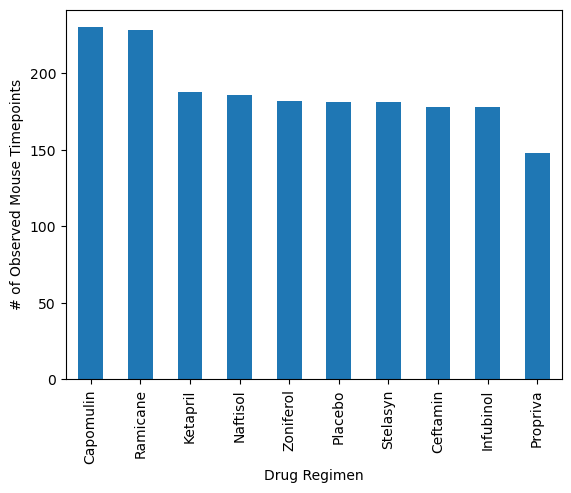

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drug_df = mouse_study_clean.groupby('Drug Regimen')
count_mice_drug_df = mice_drug_df['Mouse ID'].count()
count_mice_drug_df = count_mice_drug_df.sort_values(ascending=False)
count_mice_drug_chart = count_mice_drug_df.plot(kind = 'bar')
count_mice_drug_chart.set_xlabel('Drug Regimen')
count_mice_drug_chart.set_ylabel('# of Observed Mouse Timepoints')
plt.show()

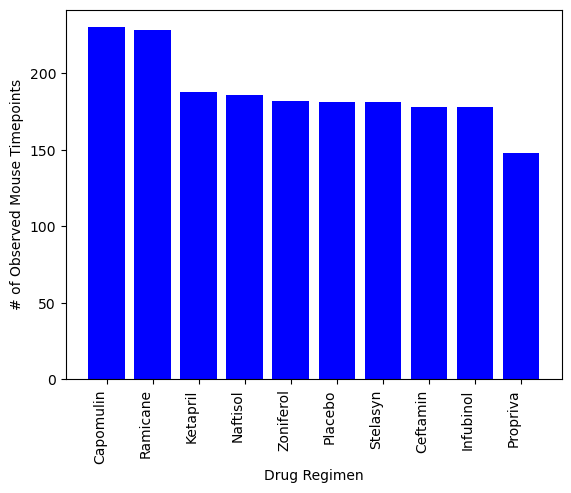

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(count_mice_drug_df.index, count_mice_drug_df, color='b' , align='center')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

Text(0, 0.5, '')

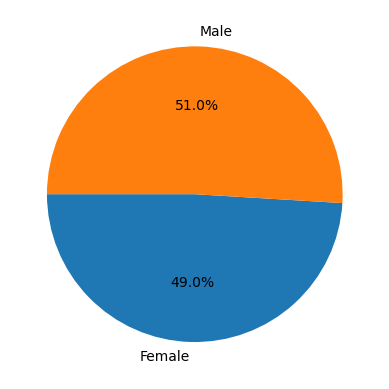

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_df = mouse_study_clean.groupby('Sex')
count_mice_sex_df = mice_sex_df['Mouse ID'].count()
count_mice_sex_df.plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.ylabel('')

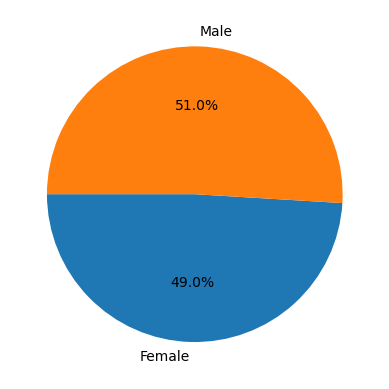

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count_mice_sex_df, labels = count_mice_sex_df.index , autopct='%1.1f%%', startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_study_clean.groupby('Mouse ID')['Timepoint'].last()
print(last_timepoint)

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64


In [26]:
# Create a grouped DataFrame that shows the last time point for each mouse
grouped_df = mouse_study_clean.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_timepoint_df = pd.merge(grouped_df, mouse_study_clean, on=['Mouse ID', 'Timepoint'], how='left')

#Create a list of treatment names and an empty list to hold tumor volume data
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

# Loop through each drug, locate the rows, and append final tumor volumes to the list
for drug in treatment_list:
    drug_data = max_timepoint_df[max_timepoint_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_volume_data.append(drug_data)

# Determine outliers using upper and lower bounds, and print the results
for i in range(len(treatment_list)):
    drug = treatment_list[i]
    volumes = tumor_volume_data[i]

    quartiles = volumes.quantile([0.25, 0.5, 0.75]).to_dict()
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])

    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]

    # Print summary for each drug
    print(f"Summary for {drug}:")
    print(f"  Quartiles: {quartiles}")
    print(f"  IQR: {quartiles[0.75] - quartiles[0.25]}")
    
    if outliers.empty:
        print("  No outliers.")
    else:
        print(f"  Outliers: {', '.join(map(str, outliers.values))}")

    print()


Summary for Capomulin:
  Quartiles: {0.25: 32.37735684, 0.5: 38.1251644, 0.75: 40.1592203}
  IQR: 7.781863460000004
  No outliers.

Summary for Ramicane:
  Quartiles: {0.25: 31.56046955, 0.5: 36.56165229, 0.75: 40.65900627}
  IQR: 9.098536719999998
  No outliers.

Summary for Infubinol:
  Quartiles: {0.25: 54.04860769, 0.5: 60.16518046, 0.75: 65.52574285}
  IQR: 11.477135160000003
  Outliers: 36.3213458

Summary for Ceftamin:
  Quartiles: {0.25: 48.72207785, 0.5: 59.85195552, 0.75: 64.29983003}
  IQR: 15.577752179999997
  No outliers.



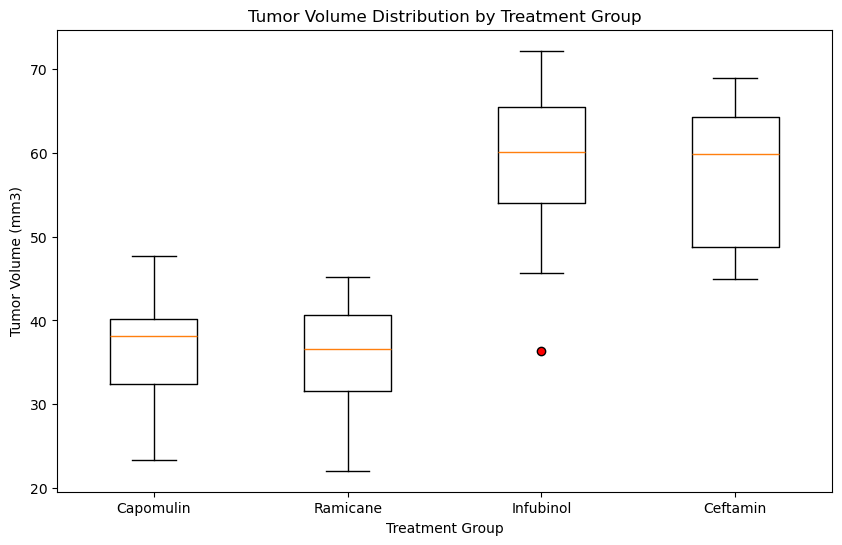

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatment_list, flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Tumor Volume Distribution by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

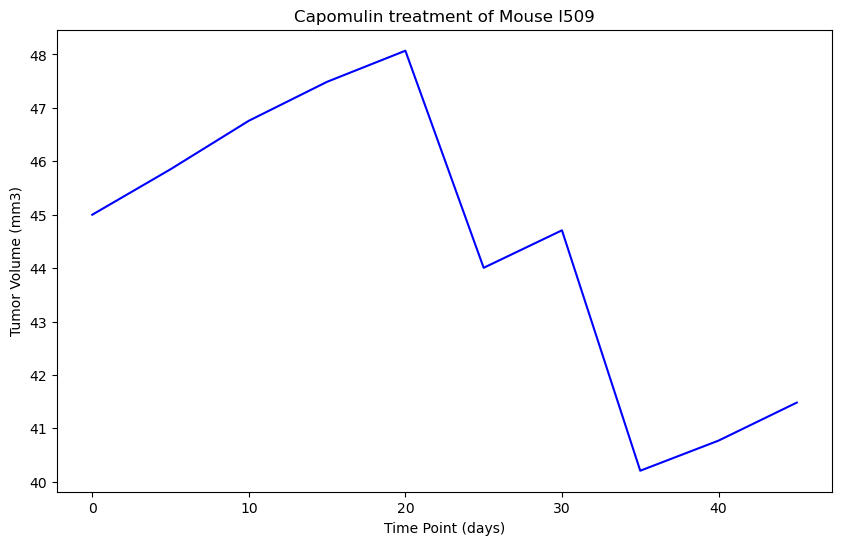

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = "l509" 

selected_mouse_data = mouse_study_clean[(mouse_study_clean['Mouse ID'] == selected_mouse_id) & 
                                        (mouse_study_clean['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], color='blue')
plt.title(f'Capomulin treatment of Mouse {selected_mouse_id}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

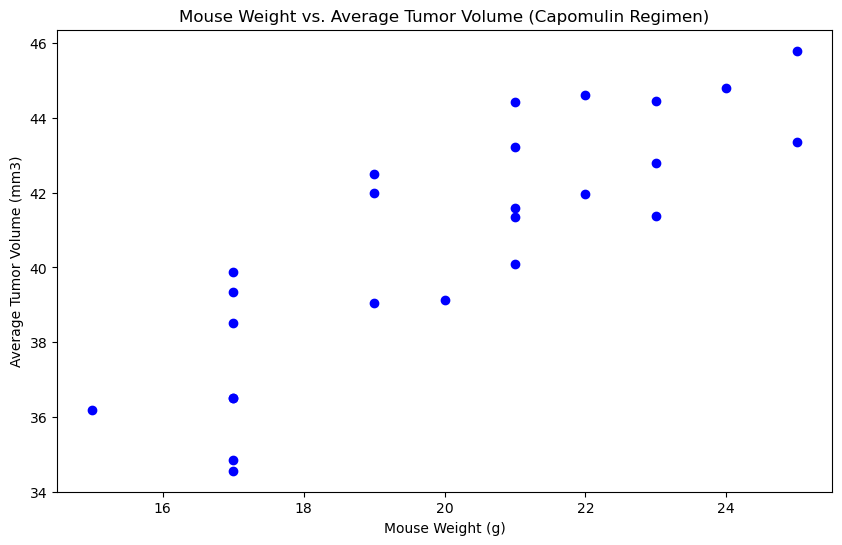

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study_clean[mouse_study_clean['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

capomulin_avg_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.841936342469472


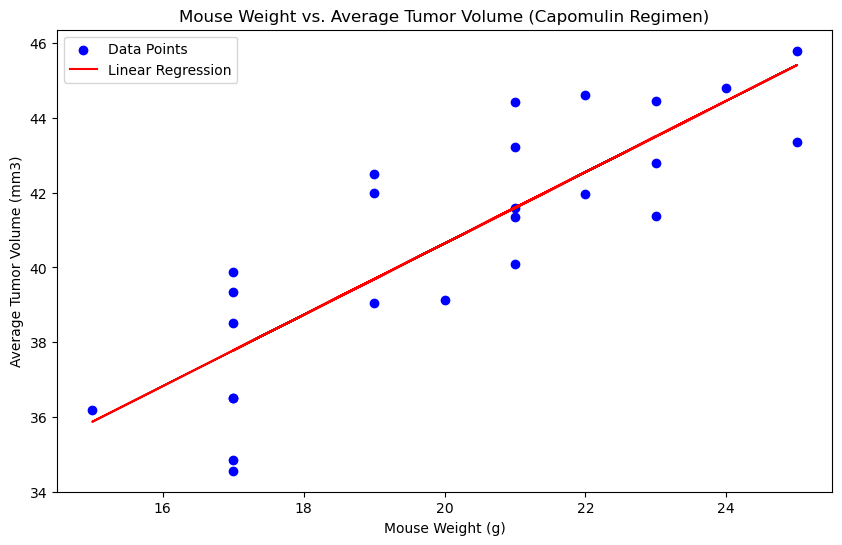

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study_clean[mouse_study_clean['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

capomulin_avg_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

correlation_coefficient, _ = st.pearsonr(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])
print(f'Correlation Coefficient: {correlation_coefficient}')

slope, intercept, _, _, _ = st.linregress(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'], marker='o', color='blue', label='Data Points')
plt.plot(capomulin_avg_data['Weight (g)'], slope * capomulin_avg_data['Weight (g)'] + intercept, color='red', label='Linear Regression')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()